# This python code is for project : Employee Absenteeism

#### Problem Statement: XYZ is a courier company. As we appreciate that human capital plays an important role in collection, transportation and delivery. The company is passing through genuine issue of Absenteeism. The company has shared it dataset and requested to have an answer on the following areas: 

##### 1. What changes company should bring to reduce the number of absenteeism?  
##### 2. How much losses every month can we project in 2011 if same trend of absenteeism continues

I am going to divide whole project in to 8 parts:
1.) Define and categorize problem statement
2.) Gather the data
3.) Prepare data for consumption
4.) Perform Exploratory Data Analysis
5.) Models Building
6.) Evaluate and compare Model performances and choose the best model
7.) Hypertune the selected model
8.) Produce sample output with tuned model

In [1]:
## ----------- Part 1: Define and categorize the problem statement --------------
#### The problem statement is to analyze the cause of absenteeism and predict the every month losses in 2011 due to absenteism.
##### This is clearly a 'Supervised machine learning regression problem' to predict a number based on the input features

## ----------- Part 1 ends here ----------------- 

In [92]:
##------------- Import all the required libraries--------------

## Import all the required libraries
import os
import pandas as pd
import numpy as np
from scipy import stats


#------ for model evaluation -----
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#----- for preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

#---- for model building
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#---- for cross validation
#from sklearn.cross_validation import train_test_split

#---- for visualization---
import matplotlib.pyplot as plt 
import seaborn as sn

#------ for model evaluation -----
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#---- For handling warnings
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [93]:
## ------------------- Part 2: Gather the data -----------------

### Here data is provided as .csv file with the problem.
### Let's import the data 
emp_abntsm=pd.read_excel('Absenteeism_at_work_Project.xls')
emp_abntsm.head()
##---------- Part 2 ends here --------------------------

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [4]:
# For ease of operations, lets change the names of the columns to short versions
#emp_abntsm.rename(columns=lambda x: x.replace(' ', '_'))
emp_abntsm=emp_abntsm.rename(columns = {'Reason for absence':'Absence_Reason','Month of absence':'Absence_Month','Day of the week':'Absence_Day','Transportation expense': 'Transportation_Expense','Distance from Residence to Work':'Work_Distance','Service time':'Service_Time','Work load Average/day ':'Average_Workload','Hit target': 'Hit_Target','Disciplinary failure':'Disciplinary_Failure','Social drinker':'Drinker','Social smoker':'Smoker','Body mass index':'BMI','Absenteeism time in hours':'Absent_Hours'})

In [5]:
emp_abntsm.head()

,ID,Absence_Reason,Absence_Month,Absence_Day,Seasons,Transportation_Expense,Work_Distance,Service_Time,Age,Average_Workload,...,Disciplinary_Failure,Education,Son,Drinker,Smoker,Pet,Weight,Height,BMI,Absent_Hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [6]:
#-- Here the target feature is: 'Absenteeism time in hour' and other 20 columns, which are mix of continous and categorical(although defined as int/floats) features are predictors.
#-- Lets analyze them further

In [7]:
# ------------Part 3 : Prepare the data for consumption(Data Cleaning) ---------------
#### 3a.) Check the shape/properties of the data
#### 3b.) Completing -- Perform missing value analysis and impute missing values if necessary
#### 3c.) Correcting -- Check for any invalid data inputs , for outliers or for any out of place data
#### 3d.) Creating -- Feature extraction . Extract any new features from existing features if required
#### 3e.) Converting -- Converting data to proper formats

In [8]:
#### --------3a.) Check the shape/properties of the data
## Check the shape of the data
emp_abntsm.shape

# what we can infer:
## ->the dataset has 740 observations and 21 features

(740, 21)

In [9]:
## Check the properties of the data
emp_abntsm.info()
# what we can infer:
# ->There are null values in the dataset
# -> The datatypes are int and float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                        740 non-null int64
Absence_Reason            737 non-null float64
Absence_Month             739 non-null float64
Absence_Day               740 non-null int64
Seasons                   740 non-null int64
Transportation_Expense    733 non-null float64
Work_Distance             737 non-null float64
Service_Time              737 non-null float64
Age                       737 non-null float64
Average_Workload          730 non-null float64
Hit_Target                734 non-null float64
Disciplinary_Failure      734 non-null float64
Education                 730 non-null float64
Son                       734 non-null float64
Drinker                   737 non-null float64
Smoker                    736 non-null float64
Pet                       738 non-null float64
Weight                    739 non-null float64
Height                    726 non-null float64
BMI     

In [10]:
#### ------------------3b.) Correcting -- Check for any invalid data inputs 
# From above observations data doesnot seem to have any invalid datatypes to be handled

# However feature 'Absence_Month' have an imvalid value 0. Lets drop it.
# ALso, as we can see, 'Absent_Hours' are 0 in some places.
# This could be result of cancelled or withdrwan leaves. Lets drop these

emp_abntsm = emp_abntsm[(emp_abntsm.Absent_Hours > 0)]
emp_abntsm = emp_abntsm[(pd.notnull(emp_abntsm.Absence_Month)) & ~(emp_abntsm.Absence_Month == 0)] 
# Let's check for the outliers in EDA step

In [11]:
# -------------- 3c.) Completing -- Perform missing value analysis and impute missing values if necessary
#-- Calculating % of nulls
(emp_abntsm.isna().sum() / emp_abntsm.shape[0])*100
# what we can infer:
# ->There are  null values in almost all the columns of the dataset, although in small amount.
# -> We'll drop all the null value rows for target variable and 
# -> We'll will impute null values for all other features.

ID                        0.000000
Absence_Reason            0.440529
Absence_Month             0.000000
Absence_Day               0.000000
Seasons                   0.000000
Transportation_Expense    0.881057
Work_Distance             0.440529
Service_Time              0.440529
Age                       0.293686
Average_Workload          1.174743
Hit_Target                0.881057
Disciplinary_Failure      0.734214
Education                 1.468429
Son                       0.881057
Drinker                   0.440529
Smoker                    0.587372
Pet                       0.293686
Weight                    0.146843
Height                    1.908957
BMI                       3.964758
Absent_Hours              0.000000
dtype: float64

In [12]:
#-- impute missing values in all the independent featues(exept Average_Workload)
#-- Replace missing of any any employee with  information of same employee from other instances
#-- example if 'Age' of employee 1 is missing, then impute it with 'Age' from other instance of employee 1.
final_col = ['Transportation_Expense','Work_Distance','Service_Time','Age','BMI','Drinker','Smoker','Height','Weight','Pet','Son','Education','Disciplinary_Failure','Hit_Target']
#----impute missing values and Nas --------
for i in emp_abntsm['ID'].unique(): 
    for j in final_col :
        emp_abntsm.loc[((emp_abntsm['ID'] == i) & (emp_abntsm[j].isna())), j] = emp_abntsm[(emp_abntsm.ID==i)][j].max()

In [13]:
#--- Now for 'Average_Workload' missing values, let's analyze which is the best way to impute 

In [14]:
emp_abntsm[['ID','Absence_Month','Average_Workload']].sort_values(['Absence_Month','ID','Average_Workload'])

,ID,Absence_Month,Average_Workload
361,1,1.0,330061.0
581,3,1.0,313532.0
583,3,1.0,313532.0
584,3,1.0,313532.0
367,3,1.0,330061.0
368,3,1.0,330061.0
365,5,1.0,330061.0
130,11,1.0,308593.0
136,11,1.0,308593.0
582,11,1.0,313532.0


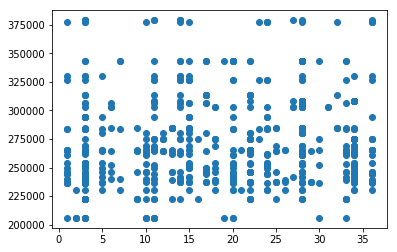

In [15]:
plt.scatter(x='ID', y='Average_Workload', s=None, c=None, marker=None, data=emp_abntsm)

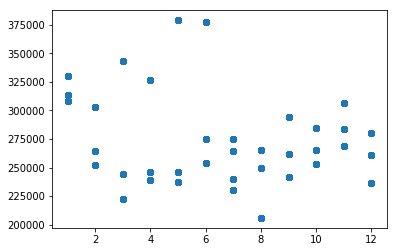

In [16]:
plt.scatter(x='Absence_Month', y='Average_Workload', s=None, c=None, marker=None, data=emp_abntsm)

In [17]:
#From above, we can deduce that 'Average_Workload' is distributed mostly by month.
#So, let's impute missing 'Average_Workload' by mode of that month

In [18]:
# update workload with the mode of corresponding month's workload
for i in emp_abntsm['Absence_Month'].unique(): 
    frequent_wrkld = stats.mode(emp_abntsm[emp_abntsm['Absence_Month']==i]['Average_Workload'])[0][0]
    emp_abntsm.loc[((emp_abntsm['Absence_Month']==i) & pd.isna(emp_abntsm['Average_Workload'])),'Average_Workload'] = frequent_wrkld

In [19]:
#Fill missing values of 'Absent_Hours' with 0
emp_abntsm.Absent_Hours = emp_abntsm.Absent_Hours.fillna(0)

In [20]:
#---- Missing Value handling ENDS here ------------------

In [21]:
#### 3d.) ------- Converting -- Converting data to proper formats
# features like 'Absence_Month','Education' are categories here. Lets convert to categories
categorical_var = ['Absence_Reason','Absence_Month','Absence_Day','Seasons','Disciplinary_Failure','Education','Son','Drinker','Smoker','Pet']
continous_var = ['ID','Transportation_Expense','Work_Distance','Service_Time','Age','Average_Workload','Hit_Target','Weight','Height','BMI']
target_var = ['Absent_Hours']

for i in categorical_var:
    emp_abntsm[i] = emp_abntsm[i].astype("category")
emp_abntsm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 681 entries, 0 to 736
Data columns (total 21 columns):
ID                        681 non-null int64
Absence_Reason            678 non-null category
Absence_Month             681 non-null category
Absence_Day               681 non-null category
Seasons                   681 non-null category
Transportation_Expense    681 non-null float64
Work_Distance             681 non-null float64
Service_Time              681 non-null float64
Age                       681 non-null float64
Average_Workload          681 non-null float64
Hit_Target                681 non-null float64
Disciplinary_Failure      681 non-null category
Education                 681 non-null category
Son                       681 non-null category
Drinker                   681 non-null category
Smoker                    681 non-null category
Pet                       681 non-null category
Weight                    681 non-null float64
Height                    681 non-null fl

In [22]:
#### -----------------3e.) Creating -- Feature extraction . Extract any new features from existing features if required

# Here we do not need any feature extraction.
# However, before feeding to model, we might need to aggregate the data

In [23]:
# ------------Part 3 : Prepare the data for consumption(Data Cleaning) ENDS here------------------------------------------------

In [24]:
# ---------------------------Part 4 : Exploratory Data Analysis(EDA) STARTS here -----------------------------------------------

In [25]:
#----- 4 a.) Outlier Analysis -----------

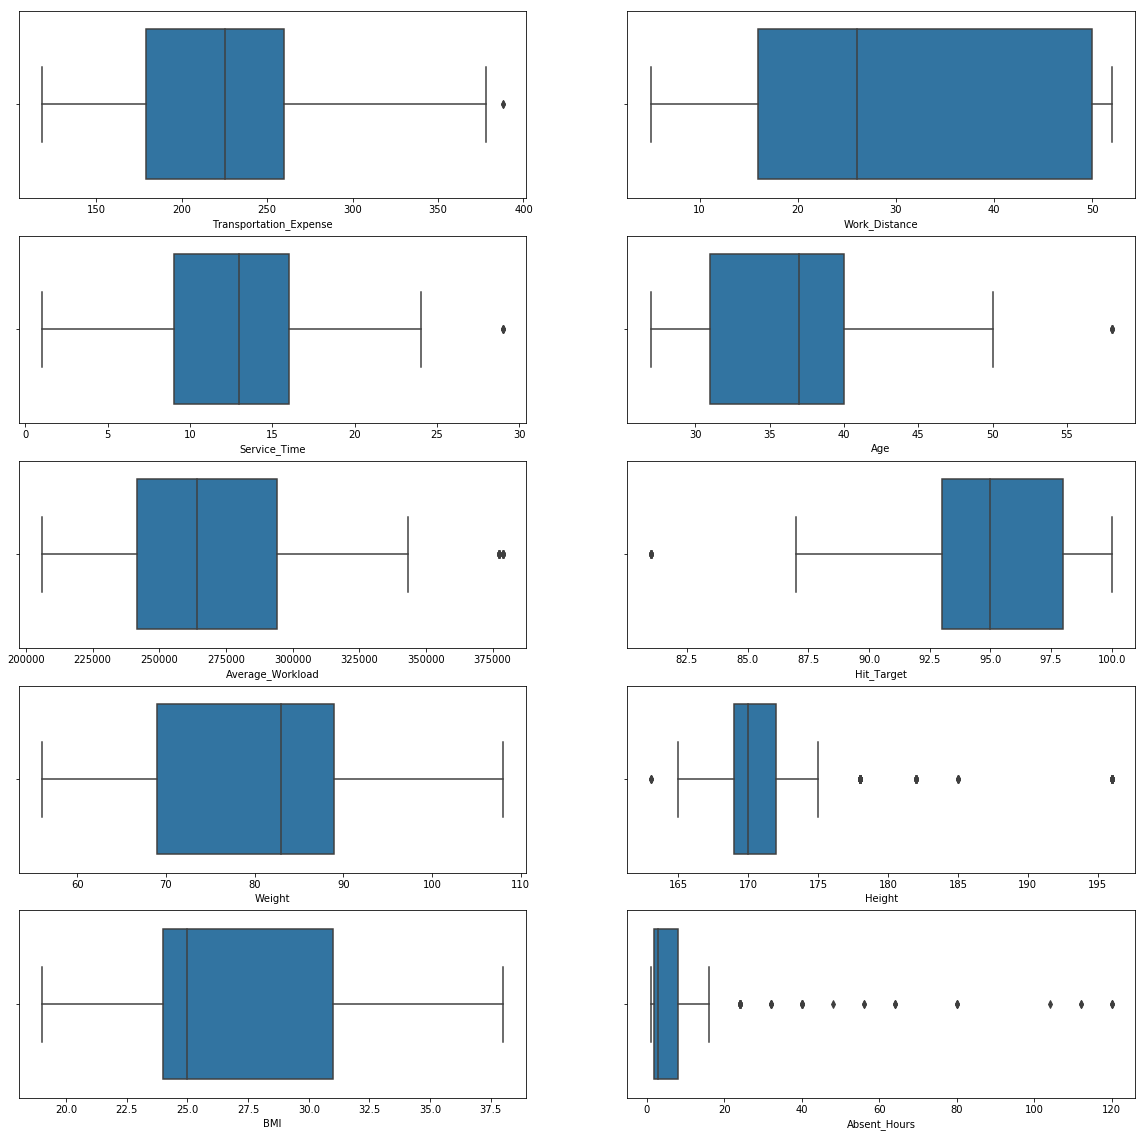

In [26]:
box = ['Transportation_Expense','Work_Distance','Service_Time','Age','Average_Workload','Hit_Target','Weight','Height','BMI','Absent_Hours']
row = 5
col = 2
r = 0
c=0
i=0
fig,ax = plt.subplots(nrows=row,ncols=col)
fig.set_size_inches(20,20)

while r < row:
    c =0
    while c < col:
        sn.boxplot(x=box[i], y=None, hue=None, data=emp_abntsm, order=None, hue_order=None, orient=None, color=None, palette=None,ax=ax[r,c])
        c=c+1
        i=i+1
    r=r+1

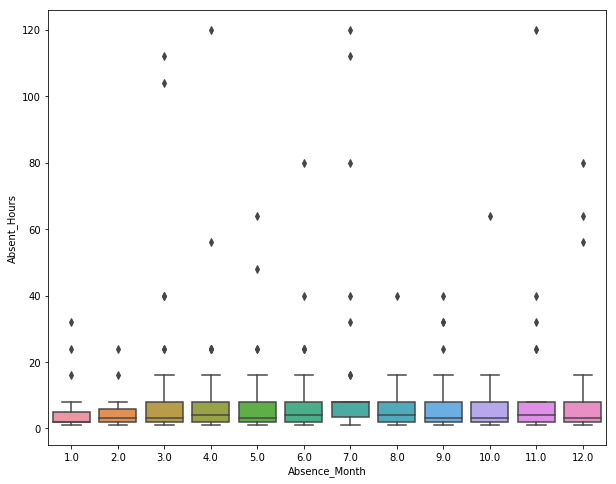

In [27]:
fig,ax = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(10,8)
sn.boxplot(x=emp_abntsm['Absence_Month'], y='Absent_Hours', hue=None, data=emp_abntsm, order=None, hue_order=None, orient=None, color=None, palette=None,ax=ax)

In [28]:
# what we can infer from above boxplots:
# --> Target feature 'Absent_hours', has many outliers. It needs to be handled( will handle it after exploratory analysis)
# -> Not many outliers in independent features. Data seems balanced.


In [29]:
#---- 4b.) Correlation Analysis
#--- Explore continous features
#--- Explore categorical features

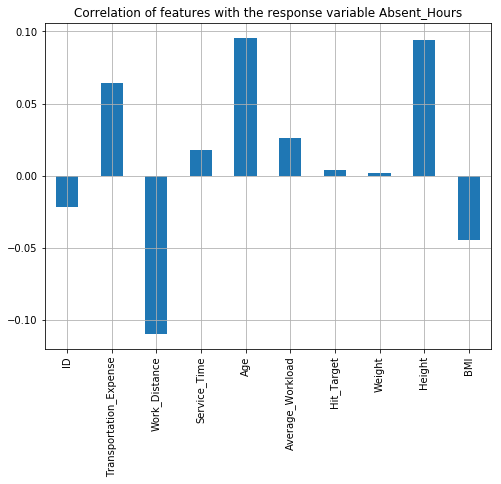

In [30]:
#------------- Explore continous features -----------------
##Explore the correlation btwn the independent continous features with target variabe
corr=emp_abntsm[continous_var].corrwith(emp_abntsm.Absent_Hours)
corr.plot.bar(figsize=(8,6), title='Correlation of features with the response variable Absent_Hours', grid=True, legend=False, style=None, fontsize=None, colormap=None, label=None)

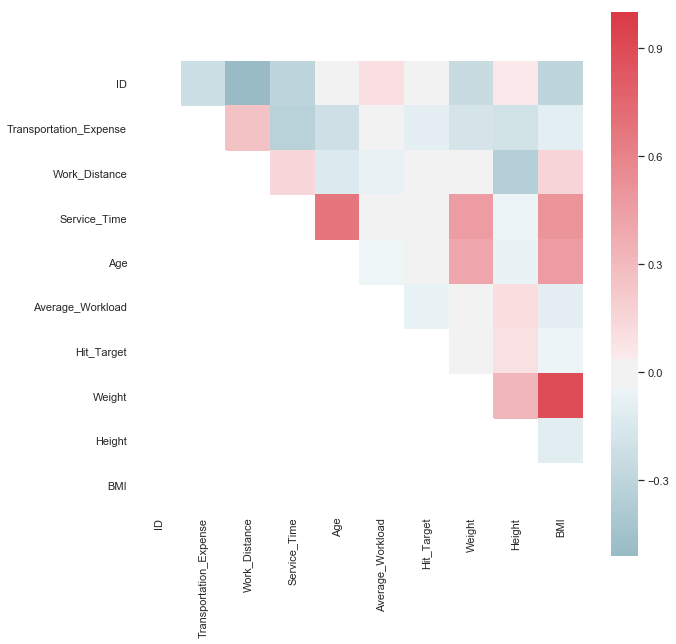

In [31]:
##------heatmap for correlation matrix---------##
##to check multicollinearity ---##

corr = emp_abntsm[continous_var].corr()
#correlation matrix
sn.set(style='white')
#compute correlation matrix
#corr =bike.drop(columns=['cnt']).corr()
#generate a mask for upper triangle#
mask =np.zeros_like(corr, dtype=np.bool)
mask[np.tril_indices_from(mask)]=True
#setuop the matplotlab figure
f,ax=plt.subplots(figsize=(10,10))
#generate a custom diverging colormap
cmap=sn.diverging_palette(220, 10, s=75, l=50, sep=10, n=6, center='light', as_cmap=True)
#heatmap
sn.heatmap(corr, vmin=None, vmax=None, cmap=cmap, center=0, robust=False, fmt='.2g', linewidths=0, linecolor='white', square=True, mask=mask, ax=None)
#correlation matrix

In [32]:
# This shows that there is multicollinearity in the dataset. BMI and Weight are highly correlated. 'Service_Time' and 'Age' are also correlated
#Will have to deal with multi collinearity by removing few features from the dataset.

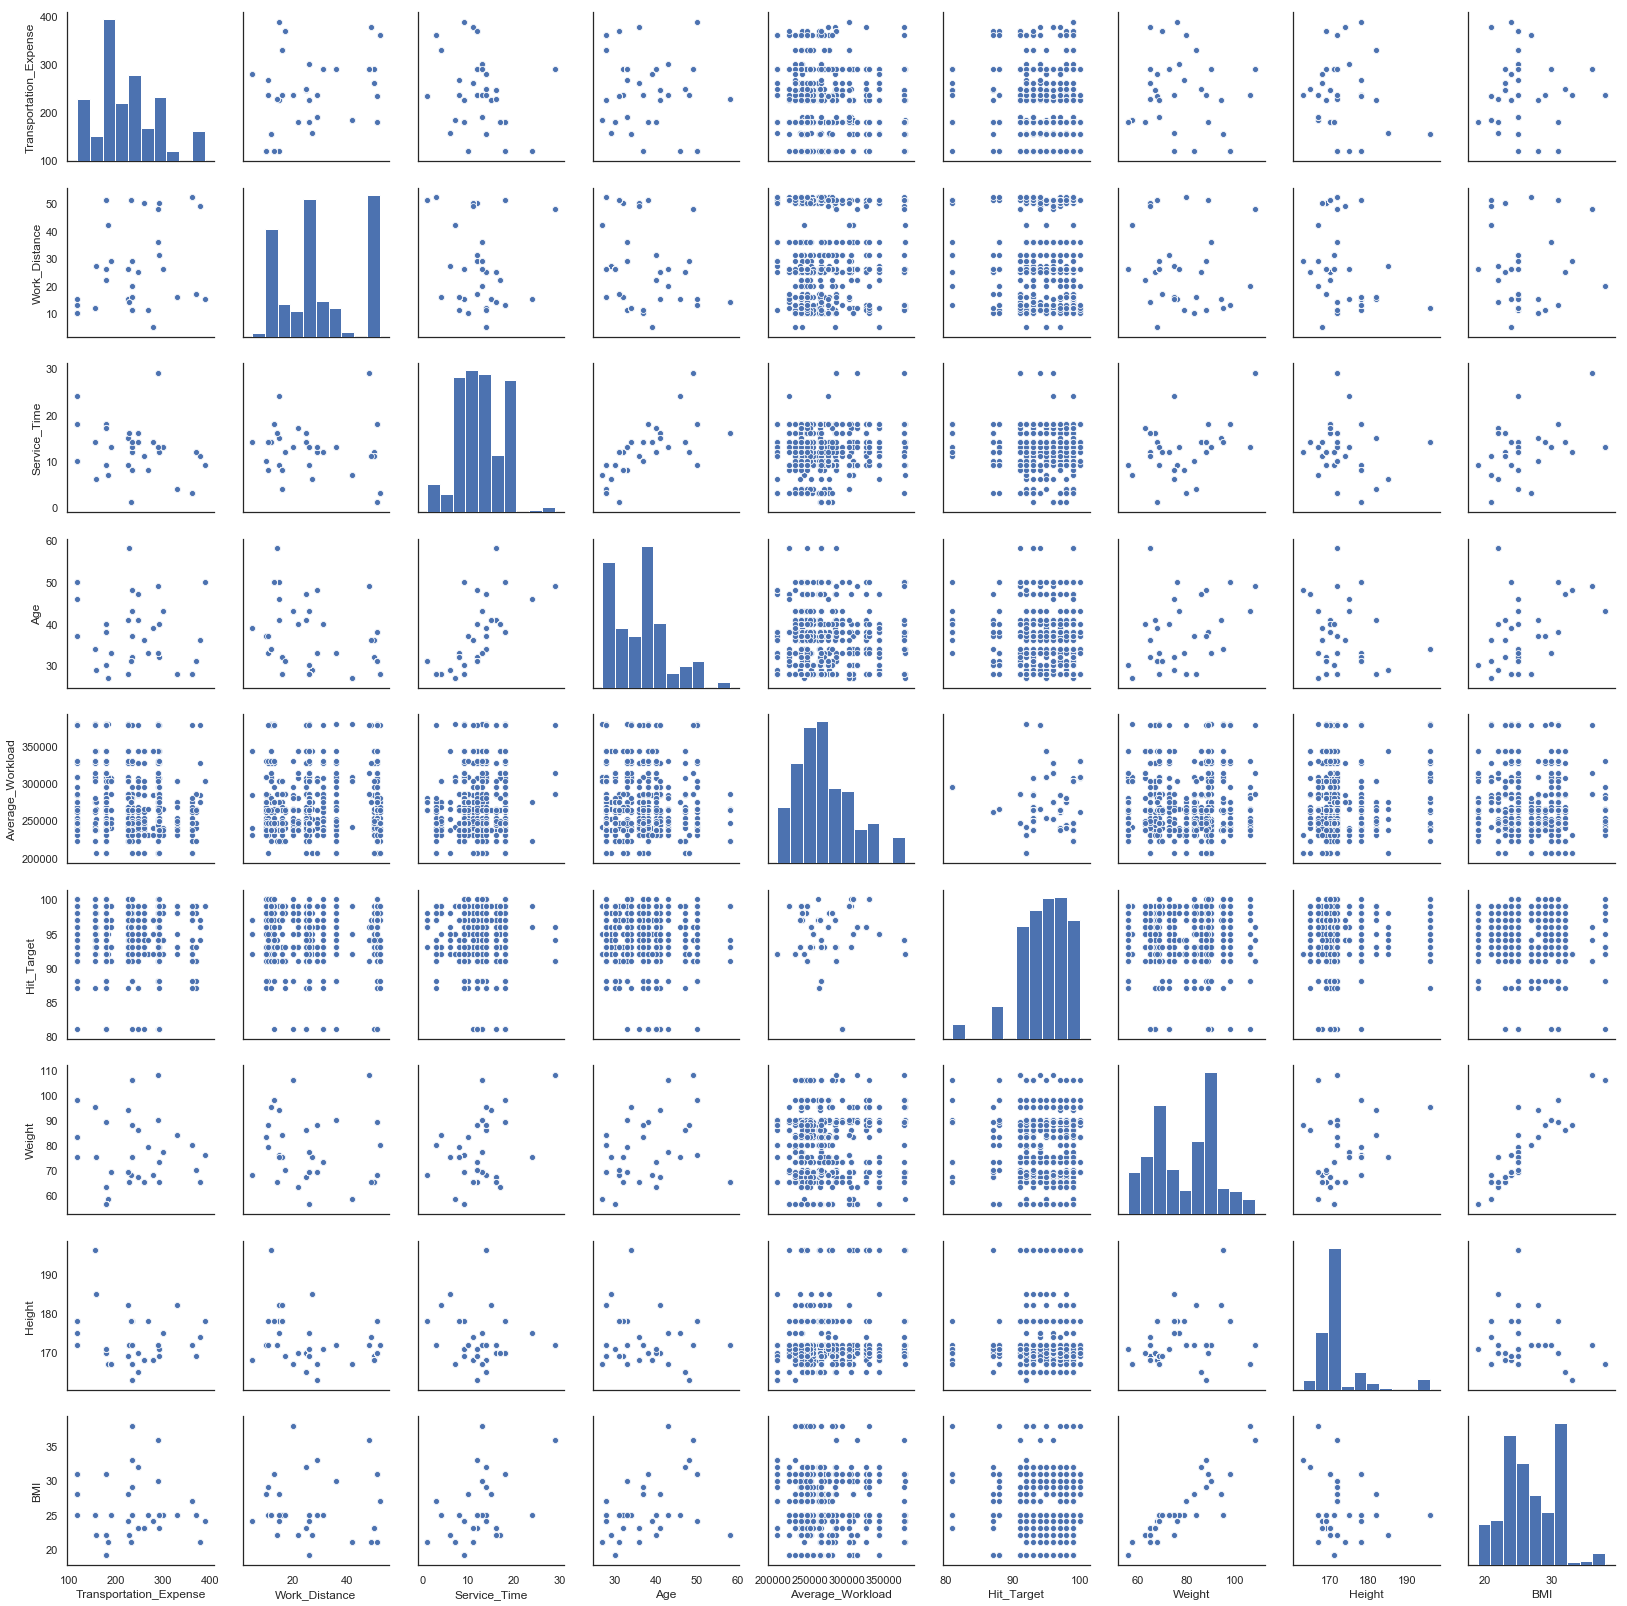

In [33]:
#Visualize the relationship among all continous variables using pairplots
NumericFeatureList=['Transportation_Expense','Work_Distance','Service_Time','Age','Average_Workload','Hit_Target','Weight','Height','BMI']
sn.pairplot(emp_abntsm,vars=NumericFeatureList)

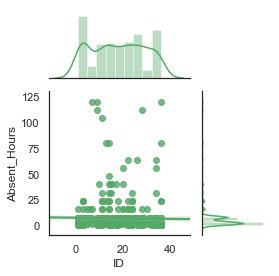

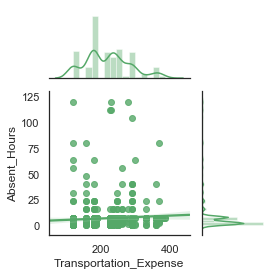

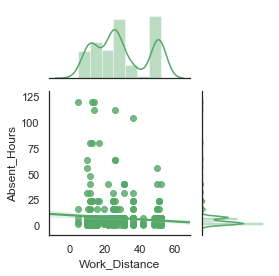

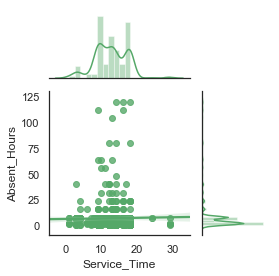

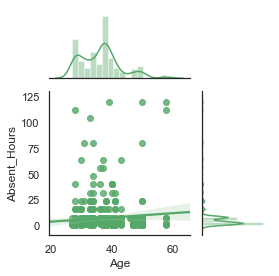

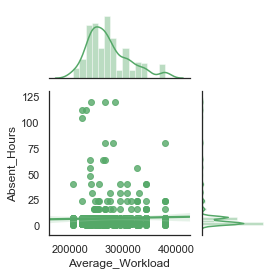

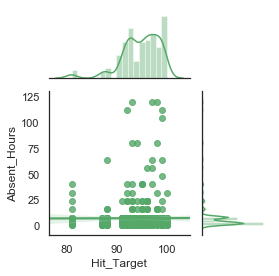

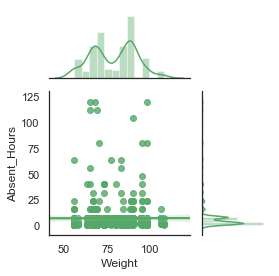

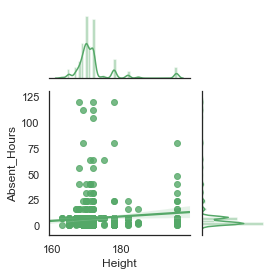

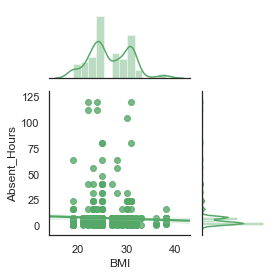

In [34]:
#Lets explore some more, the relationship btwn independent continous variables and dependent variable using JOINT PLOTs
#graph individual numeric features by 'Absent_Hours'
for i in continous_var:
    sn.jointplot(i, "Absent_Hours", data=emp_abntsm, kind='reg', color='g', size=4, ratio=2, space=0.2, dropna=True, xlim=None, ylim=None, joint_kws=None, marginal_kws=None, annot_kws=None)

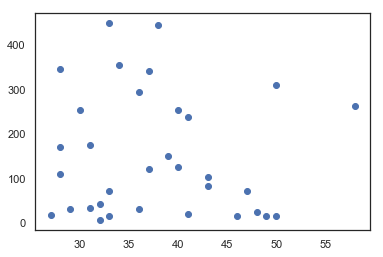

In [35]:
#--- Checking the effect of 'Age' on 'Absence'
#--- Aggregate data by 'Age' and by total hours of absence
emp_hours = emp_abntsm[['ID','Absent_Hours']].groupby('ID').sum().reset_index()
emp_age = emp_abntsm[['ID','Age']].groupby('ID').max().reset_index()
absence_by_age = emp_hours.merge(emp_age, how='inner',left_on='ID', right_on='ID')

plt.scatter('Age', 'Absent_Hours', data=absence_by_age)

In [36]:
# Clearly, people over 40+ years of age tends to take less leaves compare to others

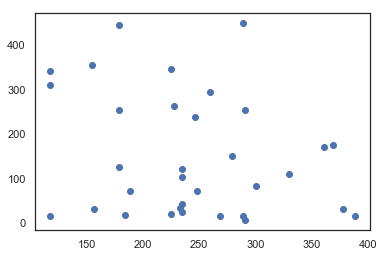

In [37]:
#--- Checking the effect of 'Transportation_Expense' on 'Absence'
#--- Aggregate data by 'Transportation_Expense' and by total hours of absence

emp_transport = emp_abntsm[['ID','Transportation_Expense']].groupby('ID').max().reset_index()
absence_by_transport = emp_hours.merge(emp_transport, how='inner',left_on='ID', right_on='ID')

plt.scatter('Transportation_Expense', 'Absent_Hours', data=absence_by_transport)

In [38]:
# This clearly shows concentration of leaves more whre the Transportation_Expense is between 150-300

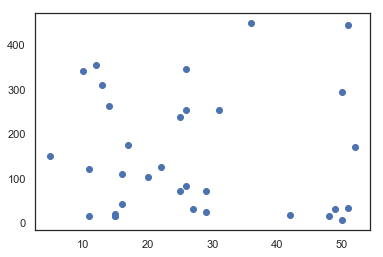

In [39]:
#--- Checking the effect of 'Work_Distance' on 'Absence'
#--- Aggregate data by 'Work_Distance' and by total hours of absence

emp_distance = emp_abntsm[['ID','Work_Distance']].groupby('ID').max().reset_index()
absence_by_distance = emp_hours.merge(emp_distance, how='inner',left_on='ID', right_on='ID')

plt.scatter('Work_Distance', 'Absent_Hours', data=absence_by_distance)

In [40]:
# This clearly shows concentration of leaves more where the distance from work is between 10-30 km

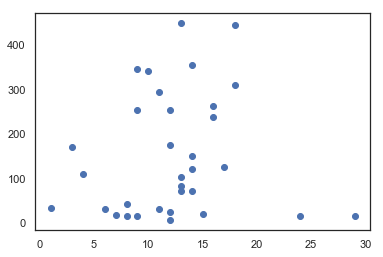

In [41]:
#--- Checking the effect of 'Service_Time' on 'Absence'
#--- Aggregate data by 'Service_Time' and by total hours of absence

emp_service = emp_abntsm[['ID','Service_Time']].groupby('ID').max().reset_index()
absence_by_service = emp_hours.merge(emp_service, how='inner',left_on='ID', right_on='ID')

plt.scatter('Service_Time', 'Absent_Hours', data=absence_by_service)

In [42]:
# Evident from above, employees with service years < 8 and >18 tends to take less leaves

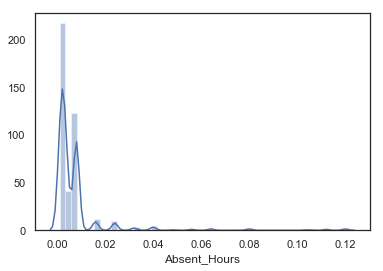

In [43]:
# Checking the distribution of target feature
sn.distplot(emp_abntsm['Absent_Hours']/1000, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)

In [44]:
# what we can infer from above analysis of continous variables:
# -> Target variable 'Absent_Hours' is not normally distributed, which is not a good thing. 
# -> We have to look in to this, before feeding the data to model.

# -> 'Work_Distance','Age','Average_Workload' has good correlation with target feature 'Absent_Hours'.
# -> Let's drop others from further analysis.

# -> There is multi collinearity in dataset. 'Work_Distance' and 'Transportation_Expense' are correlated. 
# -> However, since p(Transportation_Expense) > p(Work_Distance), we'll drop Transportation_Expense from further analysis.

In [45]:
#------------- Explore categorical features ------------------

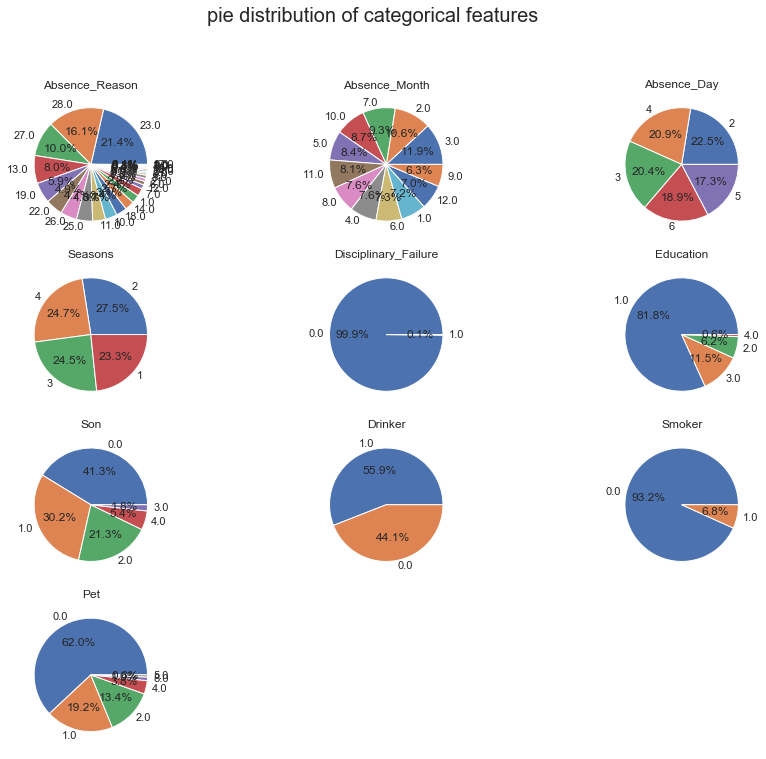

In [46]:
##checking the pie chart distribution of categorical variables
emp_piplot=emp_abntsm[categorical_var]
plt.figure(figsize=(15,12))
plt.suptitle('pie distribution of categorical features', fontsize=20)
for i in range(1,emp_piplot.shape[1]+1):
    plt.subplot(4,3,i)
    f=plt.gca()
    f.set_title(emp_piplot.columns.values[i-1])
    values=emp_piplot.iloc[:,i-1].value_counts(normalize=True).values
    index=emp_piplot.iloc[:,i-1].value_counts(normalize=True).index
    plt.pie(values,labels=index,autopct='%1.1f%%')
#plt.tight_layout()


### These pie distributions are based on the frequency of the 'leaves' taken , not on the tot no. of leaves taken.

#What we can infer from above piplot:

#-> From 'Reason' distribution, we can see that most frequent leaves are taken for the reason 23,28,27
#--------> #23 - medical consultation (23),
#--------> #28 - dental consultation (28)
#--------> #27- physiotherapy (27), 
#--------> #13 - Diseases of the musculoskeletal system and connective tissue 
#--------> #19 - Injury, poisoning and certain other consequences of external causes
#--------> #10 - Diseases of the respiratory system

#->From, 'Month' distribution, we can see that frquency of leaves are more or less uniformally distributed over months, with highest no. of leaves taken in March, Feb and July(holiday season)

#->From, 'Education' distribution, we can see that frquency of leaves are highest for education = 1(highschool)

#->From, 'Weekday' distribution, we can see that frquency of leaves are mostly distributed, with most frequent leaves on 'Monday', which makes sense as most people travel/party over weekend and the mood spills over to Monday :)

#-> From, 'Son' and 'Pet', we can see that people having no kids and no pets(no family responsibilities) tend to take frequent leaves.

#-> 'Social Drinker' takes little more leaves than non drinker.


In [47]:
# --- Now let's analyze the absence by total hours of absence (not by frequency) ----

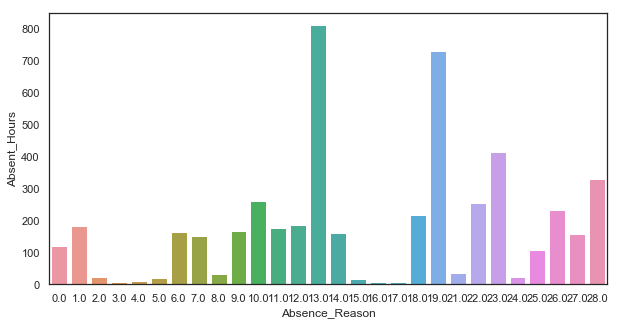

In [48]:
#--- Checking for the reason of Absence---
#checking the top reasons for absence as per the total numbers of absence
emp_reason_tot_hours = emp_abntsm[['Absence_Reason','Absent_Hours']].groupby('Absence_Reason').sum().sort_values('Absent_Hours').reset_index()
fig,ax = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(10,5)
sn.barplot(x='Absence_Reason', y='Absent_Hours', hue=None, data=emp_reason_tot_hours, order=None, hue_order=None, units=None, orient=None, color=None, palette=None,errcolor='.26', ax=ax)

#---- Longest hours of absences for reason 13,19,23,28
#--------> #23 - medical consultation (23),
#--------> #24 - blood donation (24),  
#--------> #27- physiotherapy (27), 
#--------> #28 - dental consultation (28)
#--------> #13 - Diseases of the musculoskeletal system and connective tissue 
#--------> #19 - Injury, poisoning and certain other consequences of external causes

#### Overall, 
#---> Seems like employee takes most absences for medical consulations/dental consultation/physiotherapy.
#---> these hours can be rduced by setting up a medical consultation/dental consultation/physiotherapy booth(with visiting doctors may be) at office/facility
#---> In long term, introducing exercise/yoga sessions in office once/twice a week will help reduce physiotherapy issues

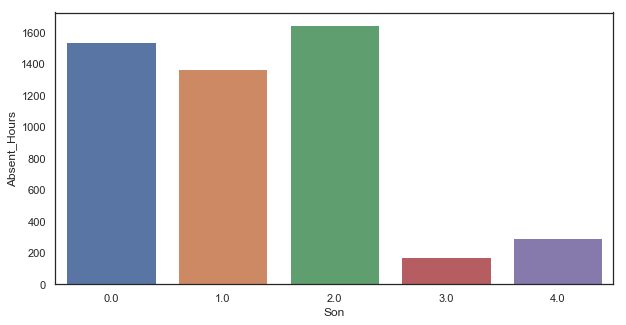

In [49]:
#Analyzing absence dependency of no of kids
emp_son_tot = emp_abntsm[['Son','Absent_Hours']].groupby('Son').sum().sort_values('Absent_Hours').reset_index()
fig,ax = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(10,5)
sn.barplot(x='Son', y='Absent_Hours', hue=None, data=emp_son_tot, order=None, hue_order=None, units=None, orient=None, color=None, palette=None,errcolor='.26', ax=ax)

In [50]:
# Clearly, employee with 3-4 kids tend to take less hours of absence

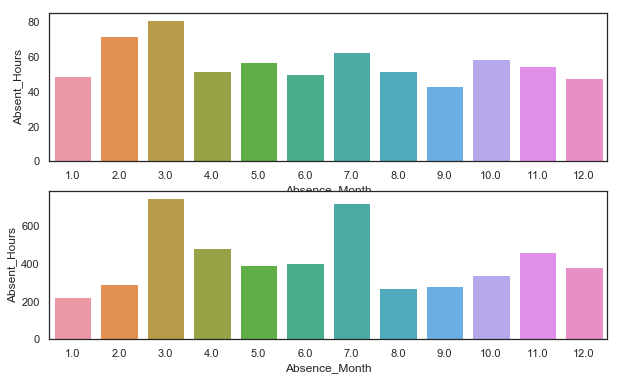

In [51]:
#Analyzing absence dependency of month of year

#--leaves by frquency 
emp_month_frequent = emp_abntsm[['Absence_Month','Absent_Hours']].groupby('Absence_Month').count().sort_values('Absent_Hours').reset_index()

#--Leaves by total hours
emp_month_tot = emp_abntsm[['Absence_Month','Absent_Hours']].groupby('Absence_Month').sum().sort_values('Absent_Hours').reset_index()
fig,ax = plt.subplots(nrows=2,ncols=1)
fig.set_size_inches(10,6)
sn.barplot(x='Absence_Month', y='Absent_Hours', hue=None, data=emp_month_frequent, order=None, hue_order=None, units=None, orient=None, color=None, palette=None,errcolor='.26', ax=ax[0])
sn.barplot(x='Absence_Month', y='Absent_Hours', hue=None, data=emp_month_tot, order=None, hue_order=None, units=None, orient=None, color=None, palette=None,errcolor='.26', ax=ax[1])

#--> Clearly, March tops the month for most absences. This makes sense as this is peak holiday season due to change of weather and clear and sunny sky
#--> Second one is July, which again is the 'holiday' season 

In [52]:
#------ Exploratory Data Analysis ENDS Here------------------
# Final observations:
#1.) 
#------------------------------------------------------------

In [53]:
#----------------------Prepare data for modelling ------------------


In [54]:
#---- Drop the features which are not very relevant based on above analyses
emp_df  = emp_abntsm[['ID','Absence_Month','Son','Drinker','Work_Distance','Service_Time','Age','Average_Workload','Absent_Hours']]

#---- Now, since we need to predict the losses per month, Lets aggregate the data on month(and ID, since the features category is different for each ID) before feeding the data to model.

In [55]:
#----Lets aggregate the data on 'Month' and 'Id'
emp_num = emp_df[['ID','Absence_Month','Work_Distance','Service_Time','Age','Average_Workload']].groupby(['ID','Absence_Month']).max().reset_index()
emp_tgt = emp_df[['ID','Absence_Month','Absent_Hours']].groupby(['ID','Absence_Month']).sum().reset_index()
emp_cat = emp_abntsm[['ID','Absence_Month','Son','Drinker']].groupby(['ID','Absence_Month']).max().reset_index()
emp = emp_num.merge(emp_cat, how='inner',left_on=['ID','Absence_Month'], right_on=['ID','Absence_Month']).merge(emp_tgt, how='inner',left_on=['ID','Absence_Month'], right_on=['ID','Absence_Month'])
emp.head()

,ID,Absence_Month,Work_Distance,Service_Time,Age,Average_Workload,Son,Drinker,Absent_Hours
0,1,1.0,11.0,14.0,37.0,330061.0,1.0,0.0,1.0
1,1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3.0,11.0,14.0,37.0,244387.0,1.0,0.0,16.0
3,1,4.0,11.0,14.0,37.0,326452.0,1.0,0.0,11.0
4,1,5.0,11.0,14.0,37.0,246074.0,1.0,0.0,16.0


In [56]:
#--- Lets deal with Nans introduced(same way already done above, by imputing)

#---- imputing Nan values with max each value present for a particular id. eg. Age will always be same for any id.
final_col = ['Work_Distance','Service_Time','Age','Drinker','Son']
#----impute missing values and Nas --------
for i in emp['ID'].unique(): 
    for j in final_col :
        emp.loc[((emp['ID'] == i) & (emp[j].isna())), j] = emp[(emp.ID==i)][j].max()
        
# update workload with the mode of corresponding month's workload
for i in emp['Absence_Month'].unique(): 
    frequent_wrkld = stats.mode(emp[emp['Absence_Month']==i]['Average_Workload'])[0][0]
    emp.loc[((emp['Absence_Month']==i) & pd.isna(emp['Average_Workload'])),'Average_Workload'] = frequent_wrkld

#update NA 'Absent_Hours' with 0
emp.Absent_Hours = emp.Absent_Hours.fillna(0)

In [57]:
emp.head()

,ID,Absence_Month,Work_Distance,Service_Time,Age,Average_Workload,Son,Drinker,Absent_Hours
0,1,1.0,11.0,14.0,37.0,330061.0,1.0,0.0,1.0
1,1,2.0,11.0,14.0,37.0,302585.0,1.0,0.0,0.0
2,1,3.0,11.0,14.0,37.0,244387.0,1.0,0.0,16.0
3,1,4.0,11.0,14.0,37.0,326452.0,1.0,0.0,11.0
4,1,5.0,11.0,14.0,37.0,246074.0,1.0,0.0,16.0


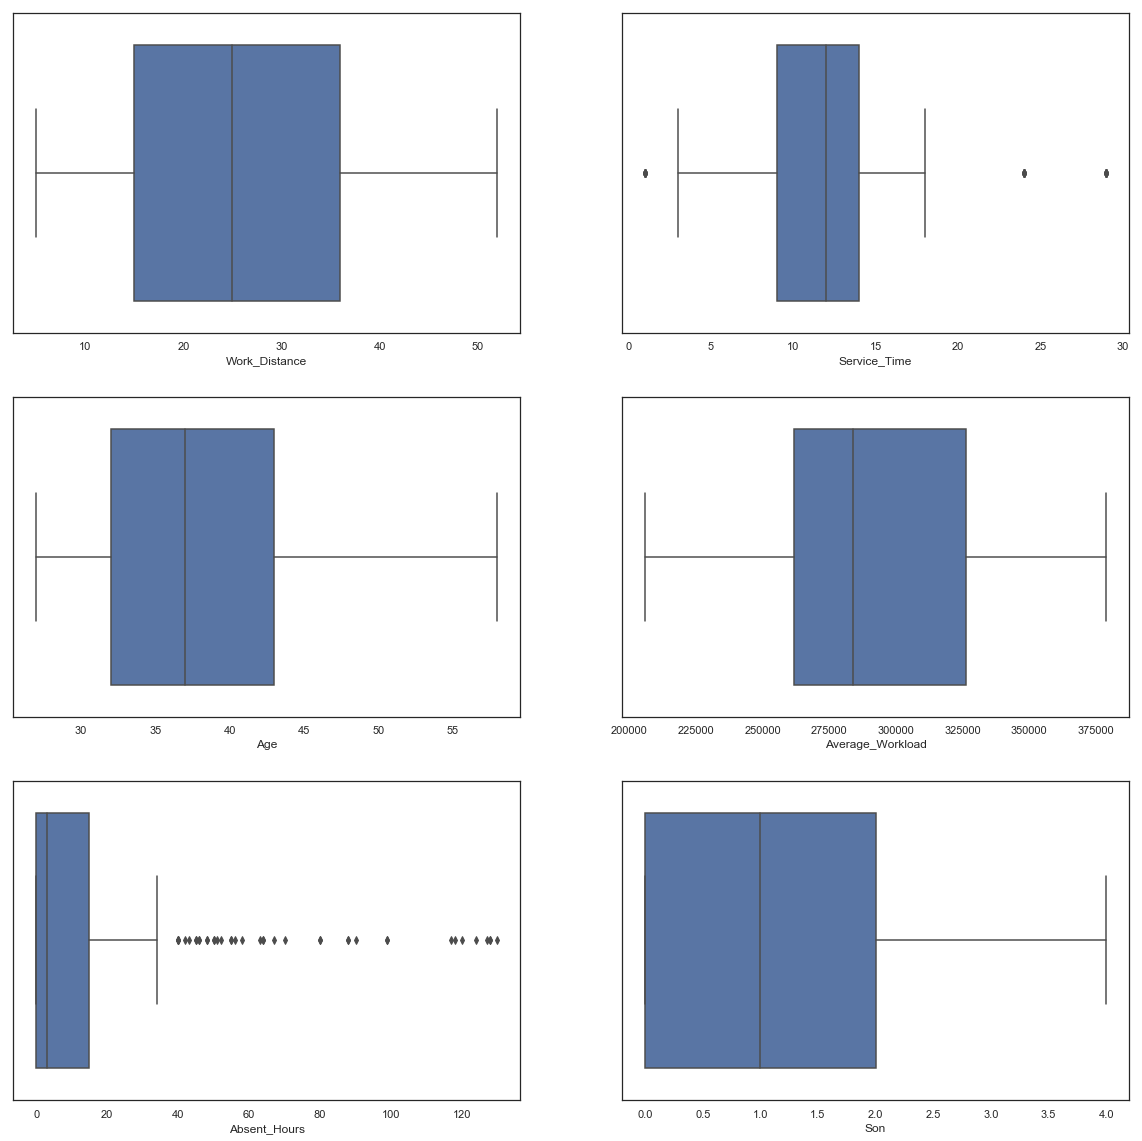

In [58]:
#----- Lets check for any outliers in the aggregated data -----
continous_var = ['Work_Distance','Service_Time','Age','Average_Workload','Absent_Hours','Son']
row = 3
col = 2
r = 0
c=0
i=0
fig,ax = plt.subplots(nrows=row,ncols=col)
fig.set_size_inches(20,20)

while r < row:
    c =0
    while c < col:
        sn.boxplot(x=continous_var[i], y=None, hue=None, data=emp, order=None, orient=None, ax=ax[r,c])
        c=c+1
        i=i+1
    r=r+1

In [59]:
# Clearly, 'Absent_Hours' has so many outliers, this will affect model. So, extreme outliers needs to be removed to make the model more generic.
# We are not removing outliers in service time, since the input data for 2011 is going to be same as 2010(except 'Age' and 'ServiceTime')

In [60]:
#----- Create a function to remove outliers from any column, from any database
def remove_outlier(df_in, col_name):
    q1 = np.percentile(df_in[col_name],25)
    q3 = np.percentile(df_in[col_name],75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [61]:
#--- remove out liers
continous_var = ['Service_Time','Age','Absent_Hours']
for i in continous_var:
    emp = remove_outlier(emp,i)

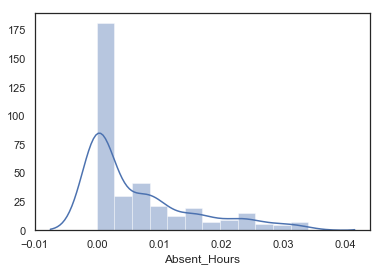

In [62]:
# Check the distribution of target feature.
#It seems better distributed then previous
sn.distplot(emp['Absent_Hours']/1000, bins=None, hist=True, kde=True)

In [63]:
emp.head()

,ID,Absence_Month,Work_Distance,Service_Time,Age,Average_Workload,Son,Drinker,Absent_Hours
0,1,1.0,11.0,14.0,37.0,330061.0,1.0,0.0,1.0
1,1,2.0,11.0,14.0,37.0,302585.0,1.0,0.0,0.0
2,1,3.0,11.0,14.0,37.0,244387.0,1.0,0.0,16.0
3,1,4.0,11.0,14.0,37.0,326452.0,1.0,0.0,11.0
4,1,5.0,11.0,14.0,37.0,246074.0,1.0,0.0,16.0


In [64]:
#--- As we can clearly see that the dataset has different features of differenr range/scale.
#--- Lets standardise the range/scale for better performance of model
#--We can use scikit-learn preprocessing library functions StandardScaler/Normalizer for the same.
# -- However, here I am using simple formula to standardize the scale
# ---------->>value(new) = (value(max) - value) / (value(max) - value(min))

In [65]:
def Standardize_Values(df):
    df_new = df
    var = ['Work_Distance','Service_Time','Age','Average_Workload']
    for i in var:
        df_new[i] = (np.max(df_new[i]) - df_new[i]) / (np.max(df_new[i]) - np.min(df_new[i]))
    return df_new

In [66]:
#--- Standardize the values ---
emp_final = Standardize_Values(emp)
emp_final.head()

,ID,Absence_Month,Work_Distance,Service_Time,Age,Average_Workload,Son,Drinker,Absent_Hours
0,1,1.0,0.87234,0.266667,0.565217,0.282268,1.0,0.0,1.0
1,1,2.0,0.87234,0.266667,0.565217,0.441119,1.0,0.0,0.0
2,1,3.0,0.87234,0.266667,0.565217,0.777588,1.0,0.0,16.0
3,1,4.0,0.87234,0.266667,0.565217,0.303133,1.0,0.0,11.0
4,1,5.0,0.87234,0.266667,0.565217,0.767834,1.0,0.0,16.0


In [67]:
#------------ Done preparing data for modelling -------------

In [68]:
#----------Part 5 : Model Builing starts here ----------------------

In [69]:
# 1.) I am selecting 3 models to test and evaluate
 #   -> Linear Regression Model
 #   -> Random Forrest (ensemble method using bagging technique)
 #   -> Gradient Boosting (ensemble method using boosting technique)
#2.) Cross validation    
#3.) All these 3 models will be compared and evaluated
#4.) We'll choose the best out of 3

In [70]:
#--- define a function which takes model, predicted and test values and returns evalution matrix: R-squared value,RootMeanSquared,MeanAbsoluteError
def model_eval_matrix(model,X_test,Y_test,Y_predict):
    r_squared = model.score(X_test, Y_test)
    mse = mean_squared_error(Y_predict, Y_test)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(Y_predict, Y_test)
    return r_squared,mse,rmse, mae

In [71]:
#train,test = train_test_split(emp_final, test_size=0.20, random_state=1)
train = emp_final[:80]
test = emp_final[20:]
X_train = train.drop(columns = ['Absent_Hours','ID'])
#Y_train = np.log(train.Absent_Hours)
Y_train = train.Absent_Hours/1000
X_test = test.drop(columns = ['Absent_Hours','ID'])
#Y_test = np.log(test.Absent_Hours)
Y_test = test.Absent_Hours/1000

In [72]:
#--Define Linear regession model --
lrm_regressor = LinearRegression()
lrm_regressor.fit(X_train, Y_train)
Y_predict_lrm =lrm_regressor.predict(X_test)

In [73]:
#------- Random Forest Model (Ensemble method using Bagging technique) --------------
forest_reg = RandomForestRegressor(n_estimators=2000, criterion='mse', max_depth=10, min_samples_split=5, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=20, min_impurity_decrease=0.00, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=1, verbose=0, warm_start=False)
forest_reg.fit(X_train, Y_train)
Y_predict_forest =forest_reg.predict(X_test)

In [74]:
## ----------- Building XGBoost Model (Ensemble method using Boosting technique) ---------------
#xgb_reg = GradientBoostingRegressor(random_state=1) # without parameter hypertuning
# Following model is with parameter hypertuning
xgb_reg = GradientBoostingRegressor(loss='ls', learning_rate=0.2, n_estimators=2000, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=1, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=15, warm_start=False, presort='auto')
xgb_reg.fit(X_train, Y_train)
Y_predict_xgb = xgb_reg.predict(X_test)

In [75]:
#---Stroring all model performances in dataframe to compare----
metric=[]
ml_models=['Linear Reg','Random Forest','GradientBoost']
fitted_models= [lrm_regressor,forest_reg,xgb_reg]
Y_Predict =[Y_predict_lrm,Y_predict_forest,Y_predict_xgb]
i=0
for mod in ml_models:
    R_SQR,MSE,RMSE,MAE = model_eval_matrix(fitted_models[i],X_test,Y_test,Y_Predict[i])
    metric.append([mod,R_SQR,MSE,RMSE,MAE])
    i=i+1
df_mod_performance=pd.DataFrame(metric,columns =['Model','R-Squared','MeanSquaredError','RootMeanSquaredError','MeanAbsoluteError'])
df_mod_performance[['Model','RootMeanSquaredError']]

,Model,RootMeanSquaredError
0,Linear Reg,0.009622
1,Random Forest,0.008857
2,GradientBoost,0.008966


In [76]:
#Clearly, Random Forest proves to be best model here -----
# We'll use Random forest as our final model to predict 2011 losses due to absence
# FINAL MODE :: RANDOM FOREST

In [77]:
absence_prediction=X_test
absence_prediction['Absent_Hours'] = 1000*Y_test
absence_prediction['Predicted_Absent_Hours'] = 1000*Y_predict_forest
#final_bike_prediction_df['Predicted_Absent_Hours'] = round(final_bike_prediction_df['Predicted_Absent_Hours'])
#--- Sample output(with actual counts and predicted counts) ---
absence_prediction

,Absence_Month,Work_Distance,Service_Time,Age,Average_Workload,Son,Drinker,Absent_Hours,Predicted_Absent_Hours
20,9.0,0.489362,0.400000,0.086957,0.677170,1.0,0.0,0.0,0.740260
21,10.0,0.489362,0.400000,0.086957,0.543635,1.0,0.0,0.0,0.635408
22,11.0,0.489362,0.400000,0.086957,0.419381,1.0,0.0,0.0,0.910116
23,12.0,0.489362,0.400000,0.086957,0.568519,1.0,0.0,0.0,1.202804
24,1.0,0.021277,0.000000,0.521739,0.282268,0.0,1.0,10.0,12.792641
28,5.0,0.021277,0.000000,0.521739,0.000000,0.0,1.0,14.0,15.493096
30,7.0,0.021277,0.000000,0.521739,0.598796,0.0,1.0,26.0,23.483712
31,8.0,0.021277,0.000000,0.521739,0.746310,0.0,1.0,21.0,17.002135
33,10.0,0.021277,0.000000,0.521739,0.543635,0.0,1.0,15.0,18.041560
34,11.0,0.021277,0.000000,0.521739,0.419381,0.0,1.0,25.0,19.339620


In [78]:
#Predicted absence hours of 2010
absence_prediction.Predicted_Absent_Hours.sum()

2477.1705362688126

In [79]:
#Actual absence hours of 2010
absence_prediction.Absent_Hours.sum()

1884.0

In [80]:
#--- Predicted absence hours per month 
absence_prediction.groupby('Absence_Month').sum().reset_index()[['Absence_Month','Absent_Hours','Predicted_Absent_Hours']]

,Absence_Month,Absent_Hours,Predicted_Absent_Hours
0,1.0,106.0,149.293640
1,2.0,157.0,194.861068
2,3.0,131.0,165.646979
3,4.0,237.0,200.791133
4,5.0,241.0,259.854181
5,6.0,90.0,224.818976
6,7.0,209.0,275.983060
7,8.0,121.0,220.663506
8,9.0,101.0,164.360097
9,10.0,139.0,185.026419


Since, random forest model is our final model to be used for prediction, We'll use this model to predict the losses of 2011.
Let's prepare data for 2011

To prepare data for 2011,assuming that all the employees are retained in 2011 and all other condition remains and same trends continues, we need to add +1 to 'Service_Time' and 'Age'(keeping all other features same)

In [81]:
#--------data fo 2011
#--- service and age will be added by 1

emp_2011 = emp
emp_2011.Service_Time = emp.Service_Time + 1
emp_2011.Age = emp.Age + 1

In [82]:
emp_2011= emp_2011.drop(columns = ['Absent_Hours','ID'])

In [83]:
#-------- Standardise the scale, before passing the input to model
emp_2011 = Standardize_Values(emp_2011)

In [84]:
predict_2011_absence =forest_reg.predict(emp_2011)

In [85]:
absence_prediction_2011=emp_2011
absence_prediction_2011['Predicted_Absent_Hours'] = predict_2011_absence*1000

absence_prediction_2011

,Absence_Month,Work_Distance,Service_Time,Age,Average_Workload,Son,Drinker,Predicted_Absent_Hours
0,1.0,0.127660,0.733333,0.434783,0.717732,1.0,0.0,8.177386
1,2.0,0.127660,0.733333,0.434783,0.558881,1.0,0.0,8.222355
2,3.0,0.127660,0.733333,0.434783,0.222412,1.0,0.0,8.443030
3,4.0,0.127660,0.733333,0.434783,0.696867,1.0,0.0,9.948527
4,5.0,0.127660,0.733333,0.434783,0.232166,1.0,0.0,11.135059
5,6.0,0.127660,0.733333,0.434783,0.992288,1.0,0.0,14.380590
6,7.0,0.127660,0.733333,0.434783,0.339296,1.0,0.0,14.454196
7,8.0,0.127660,0.733333,0.434783,0.345141,1.0,0.0,13.663427
8,9.0,0.127660,0.733333,0.434783,0.322830,1.0,0.0,13.099789
9,10.0,0.127660,0.733333,0.434783,0.341684,1.0,0.0,12.839140


In [86]:
monthly_absence= absence_prediction_2011.groupby('Absence_Month').sum().reset_index()[['Absence_Month','Predicted_Absent_Hours']]
monthly_absence

,Absence_Month,Predicted_Absent_Hours
0,1.0,212.379975
1,2.0,204.552231
2,3.0,212.581097
3,4.0,233.110639
4,5.0,277.112115
5,6.0,344.247485
6,7.0,262.517714
7,8.0,269.435842
8,9.0,245.273575
9,10.0,240.641277


In [87]:
#lets say in a month excluding weekend 22 days are working days. total working hours of 36 employees will be 22*8*36.
# total losses % = (absent_hours / Total_Hours)*100
tot_Monthly_hours = 22*8*36
monthly_absence['monthly_loss_percentage'] = (monthly_absence['Predicted_Absent_Hours']/tot_Monthly_hours) * 100

In [88]:
#---------MONTHLY LOSSES PREDICTED FOR YEAR 2011 PER MONTH -----------

In [89]:
monthly_absence

,Absence_Month,Predicted_Absent_Hours,monthly_loss_percentage
0,1.0,212.379975,3.351957
1,2.0,204.552231,3.228413
2,3.0,212.581097,3.355131
3,4.0,233.110639,3.679145
4,5.0,277.112115,4.373613
5,6.0,344.247485,5.433199
6,7.0,262.517714,4.143272
7,8.0,269.435842,4.252460
8,9.0,245.273575,3.871111
9,10.0,240.641277,3.798000


In [90]:
#---------------------------------------------------------------------

In [91]:
# Hereby, concluding the project with above predictions 